<center>
<font size="5"> <b>Exercices de statistique avec R</b></font>
</center>


### Exercice : 

Le but de cet exercice est de générer une variable aléatoire normale à partir d'une variable aléatoire uniforme.
1. Générer un échantillon de 10000 valeurs tirées uniformément entre 0 et 1.
2. A partir de cet échantillon, construire un échantillon de 10000 valeurs distribuées suivant une loi normale de moyenne égale à 0.5 et d'écart-type égal à 0.2
3. Faire les histogrammes des deux échantillons.
4. Calculer la moyenne empirique et l'écart-type empirique pour le deuxième échantillon. Comparer les valeurs obtenues aux valeurs attendues.

[1] "The mean (sd) is: 0.50 (0.20)"

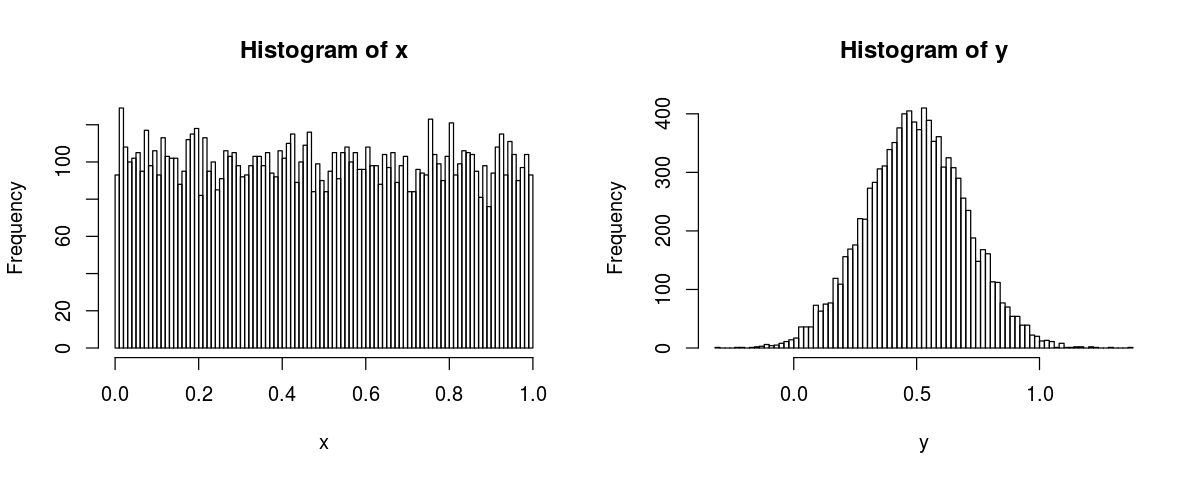

In [40]:
x<-runif(10000)
mu<-0.5
sigma<-0.2
y<-qnorm(x, mu, sigma)

par(mfrow = c(1,2))
options(repr.plot.width=10, repr.plot.height=4)
hist(x, breaks=100)
hist(y, breaks=100)

sprintf("The mean (sd) is: %.2f (%.2f)", mean(y), sd(y))

### Exercice :

Dans cet exercice, nous nous proposons de vérifier le théorème central limite empiriquement, à partir de variables aléatoires i.i.d uniforme. Soit $X\sim U(0, 1)$ et soit $S$ la somme de plusieurs réalisations de $X$ :

$$S = \sum_{i=1}^{n} X_i$$

1. Calculer la moyenne et l'écart-type de $X$.
2. On prend $n=6$. Tirer un grand nombre de fois les $X_i$ et, à chaque fois, calculer la variable centrée réduite de $S$ (que l'on notera $S'$).
3. Représenter la distribution de $S'$.
4. Superposer la loi normale centrée réduite.
5. Recommencer pour différentes valeurs de $n$.
6. Conclusions ?

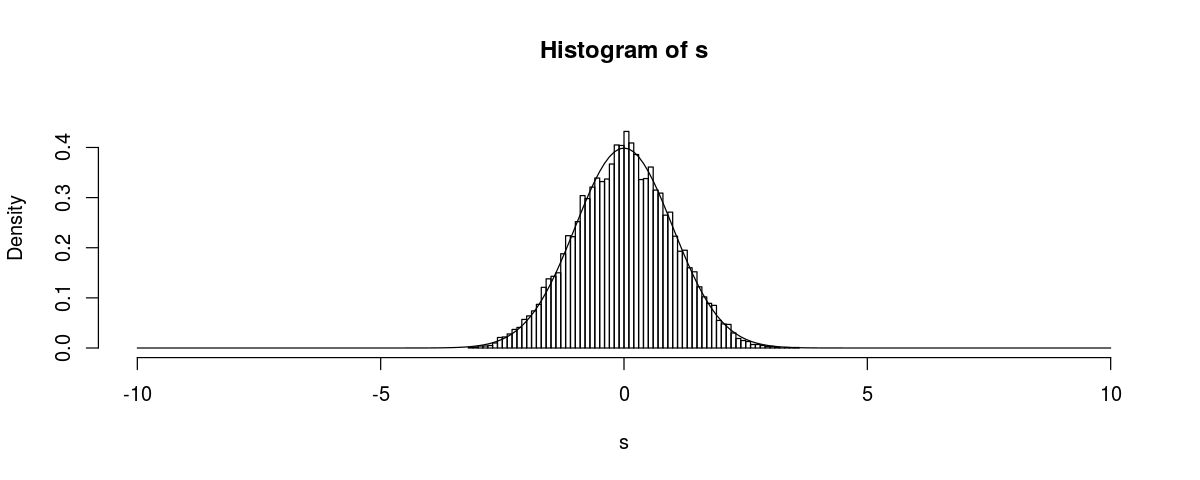

In [43]:
N=10000
Nterms=6

s = c()

min = 0
max = 1
avg = (min+max)/2
stddev = (max-min)/sqrt(12)

for (i in 1:N) {
    vars = runif(Nterms, min = min, max = max)
    s[i] = (sum(vars) - Nterms*avg)/(stddev*sqrt(Nterms))
}

hist(s, breaks=50, xlim=c(-10,10), ylim=c(0, dnorm(0)*1.2), prob=T)

pts = seq(-10, 10, by=0.1)
lines(pts, dnorm(pts))

### Exercice : Visualisation de la loi de Student

Soit $X$ un échantillon de valeurs tirées suivant une loi normale de moyenne $\mu$ et écart-type $\sigma$. Nous savons que

$$Z = \frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$$

est distribué suivant une loi normale centrée réduite et que 

$$T = \frac{\bar{X} - \mu}{s/\sqrt(n)}$$

avec $s^2=\frac{1}{n-1}\sum_{i=1}^{n}(X_i - \bar{X})^2$ est distribué suivant une loi de Student à $n-1$ degrés de libertés.

Le but de cet exercice est de générer et représenter les distributions de $Z$ et $T$ afin de les comparer.

1. Générer un échantillon $X$ de taille 3 avec $\mu=3$ et $\sigma=2$.
2. Répéter cela 10000 fois et, à chaque fois, calculer $Z$ et $T$.
3. Représenter les distributions de $Z$ et $T$.

[1] 219.5276

[1] -96.70626

Warning message in if (!add) {:
“the condition has length > 1 and only the first element will be used”

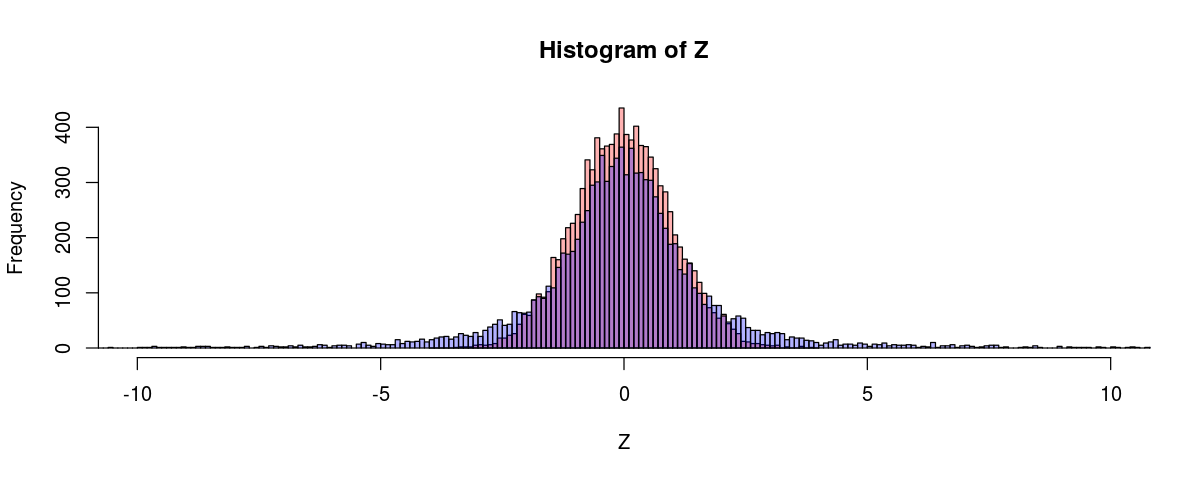

In [86]:
size = 3
mu = 3
sd = 2

n = 10000

Z = c()
T = c()

for(i in 1:n) {
    X = rnorm(size, mean = mu, sd = sd)
    Z[i] = (mean(X)-mu)/(sd/sqrt(size))
    T[i] = (mean(X)-mu)/(sd(X)/sqrt(size))
}

#hist(Z, prob=T)
max(T)
min(T)

hist(Z, breaks=seq(floor(min(Z)), ceiling(max(Z)), by=0.1), xlim=c(-10, 10), col=rgb(1,0,0,0.3))
hist(T, breaks=seq(floor(min(T)), ceiling(max(T)), by=0.1), xlim=c(-10, 10), add=T, col=rgb(0,0,1,0.3))

## Autre solution
#library(ggplot2)
#mu.x = 100  # population value
#sd.x = 15   # population value
#n = 3       # small sample size to highlight t distribution tails
#sample.n = function(n){rnorm(n, mu.x, sd.x)}
#calculate.t = function(x){(mean(x) - mu.x)/(sd(x)/sqrt(length(x)))} # uses sample sd
#calculate.z = function(x){(mean(x) - mu.x)/(sd.x /sqrt(length(x)))} # uses population sd
#sample.ts = replicate(1000, calculate.t(sample.n(n)))
#sample.zs = replicate(1000, calculate.z(sample.n(n)))
#df = rbind(data.frame(value=sample.ts, statistic="T"),
#           data.frame(value=sample.zs, statistic="Z"))
#ggplot(df, aes(x=value, fill=statistic))+
#  geom_histogram(position="identity", binwidth=0.2, alpha=0.5)+
#  scale_x_continuous(limits=c(-5,5))

### Exercice (pris d'[ici](http://www.real-statistics.com/students-t-distribution/one-sample-t-test/)):

Un programme de reduction de poids prétend réduire l'obésité. Pour le vérifier, le programme est appliqué à 12 personnes et la variation de poids pour chacun d'eux est mesurée après 2 ans. La perte de poids pour chaque personne est donnée dans la table ci-dessous (les valeurs négatives indiquent un gain de poids à l'issu du programme).
Peut-on conclure de ces résultats que le programme réduit bien l'obésité ?

| Personne | Différence de poids |
|---------|-------------|
| 1       | 23          |
| 2       | 15          |
| 3       | -5          |
| 4       | 7           |
| 5       | 1           |
| 6       | -10         |
| 7       | 12          |
| 8       | -8          |
| 9       | 20          |
| 10      | 8           |
| 11      | -2          |
| 12      | -5          |

[1] 12

[1] 4.666667

[1] 11.15456

[1] 3.220045

[1] 1.449255

[1] 1.795885

[1] 0.08758473


	One Sample t-test

data:  sample
t = 1.4493, df = 11, p-value = 0.08758
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 -1.116162       Inf
sample estimates:
mean of x 
 4.666667 


[1] "Conclusion: the weight loss is, at the 95% CL, not different from 0."


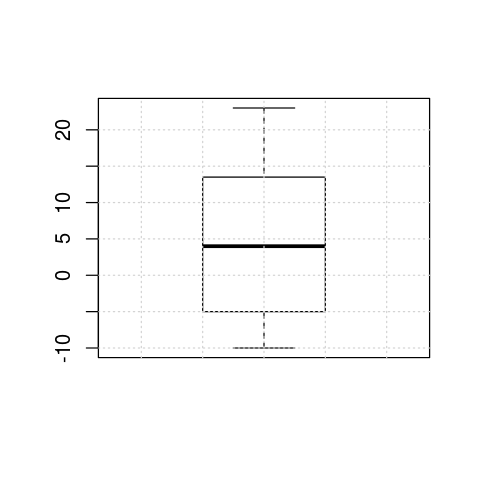

In [5]:
sample = c(23, 15, -5, 7, 1, -10, 12, -8, 20, 8, -2, -5)

n = length(sample)
m = mean(sample)
sigma = sd(sample)
err = sigma/sqrt(n)
n
m
sigma
err
mu = 0
t = (m-mu)/err
t
alpha = 0.05
tcrit = qt(1-alpha, n-1)
tcrit
pvalue = 1 - pt(t, n-1)
pvalue

# Or use right away the redefined R functionalities
t.test(sample, mu=0, alternative="greater")

# Empirical verifications of assumptions
options(repr.plot.width=4, repr.plot.height=4)
boxplot(sample)
grid()

print("Conclusion: the weight loss is, at the 95% CL, not different from 0.")

### Exercice (pris d'[ici](http://www.real-statistics.com/students-t-distribution/one-sample-t-test/)): 

Il y a 30 ans, la note moyenne des étudiants dans une promotion était de 78 sur 100. Afin de voir si la note moyenne a  évoluée en 30 ans, un test est réalisé cette année sur 40 étudiants. Les notes obtenues sont les suivantes :

|    |    |    |    |
|----|----|----|----|
| 63 | 58 | 76 | 59 |
| 95 | 84 | 83 | 68 |
| 81 | 90 | 87 | 45 |
| 75 | 38 | 54 | 52 |
| 90 | 100 | 45 | 76 | 
| 64 | 80 | 58 | 78 | 
| 45 | 68 | 64 | 50 |
| 59 | 49 | 63 | 75 | 
| 72 | 68 | 92 | 64 |
| 35 | 60 | 87 | 86 |

Peut-on dire que la note moyenne a changée en 30 ans ? (Dans ce cas on considère les variations à la baisse et à la hausse, on réalise donc un test bilatéral)

In [ ]:
sample = c(63, 58, 76, 59,
           95, 84, 83, 68,
           81, 90, 87, 45,
           75, 38, 54, 52,
           90, 100, 45, 76, 
           64, 80, 58, 78, 
           45, 68, 64, 50,
           59, 49, 63, 75, 
           72, 68, 92, 64,
           35, 60, 87, 86)
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow = c(1, 2))
hist(sample, breaks=20)
boxplot(sample)
grid()

n = length(sample)
t = (mean(sample) - 78)/(sd(sample)/sqrt(n))
t
pvalue = pt(t, n-1)*2 # probability on left-side tail, as the observed value of the test is negative
pvalue